# Task 1- Iris Flower Classification


#  Name : Misba Shaikh


# Importing Libraries

In [54]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Loading the data

In [55]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

# Creating the list of column name:

In [56]:
column_name = ['sepal_length' , 'sepal_width', 'petal_length' , 'petal_width', 'class' ]

# For reading the csv file

In [57]:
dataset = pd.read_csv(url, names= column_name)

# Summarize the Dataset

In [58]:
dataset.shape

(150, 5)

In [59]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [61]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

# Data Visualization Violin Plot

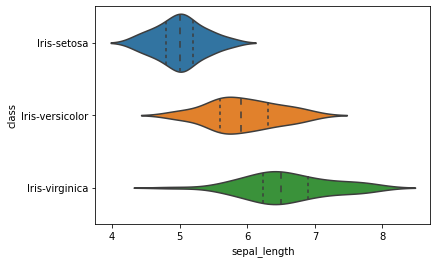

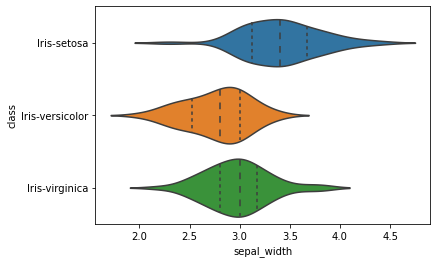

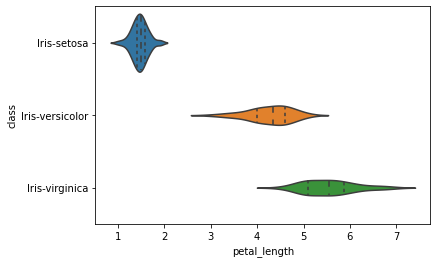

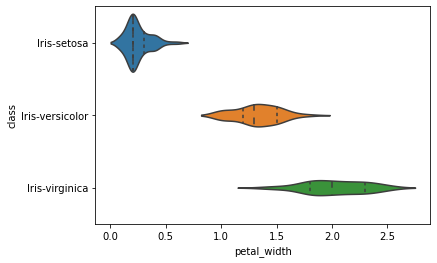

In [63]:
sns.violinplot(y='class', x='sepal_length', data= dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data= dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=dataset, inner='quartile')
plt.show()


# Pair Plot

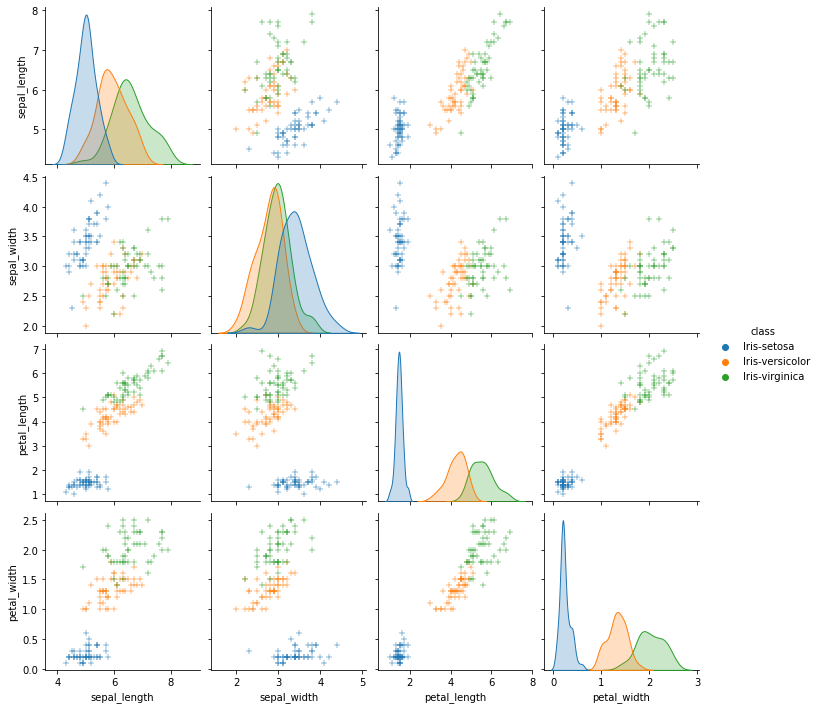

In [64]:
sns.pairplot(dataset, hue='class' , markers='+')
plt.show()

# Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

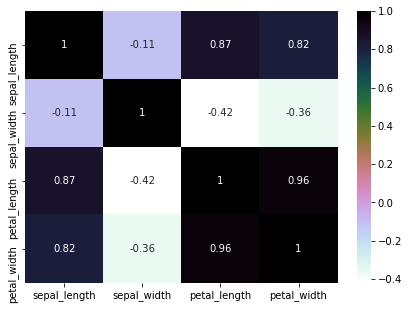

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(),
annot=True , cmap='cubehelix_r')
plt.show

# Splitting the dataset

In [67]:
x = dataset.drop(['class'],axis=1)
y = dataset['class']
print(f'x shape: {x.shape} | y shape:{y.shape} ')

x shape: (150, 4) | y shape:(150,) 


# Train Test Split

In [68]:
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size=0.20 , random_state=1)

In [77]:
models = []

models.append(('LR',
LogisticRegression()))
models.append(('LDA',
LinearDiscriminantAnalysis()))
models.append(('KNN',
KNeighborsClassifier()))
models.append(('CART',
DecisionTreeClassifier()))
models.append(('NB',
GaussianNB()))
models.append(('SVC',
SVC(gamma='auto')))

# evaluate each model in turn

results = []

model_names = []

for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

results.append(cv_results)

model_names.append(name)

print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


               

SVC: 0.983333 (0.033333)


In [78]:
model = SVC(gamma='auto')
model.fit(x_train , y_train)

prediction= model.predict(x_test)

# The Classification Report

In [75]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report:\n {classification_report(y_test,prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

